# Simulations

This notebook introduces the simulations used in this project.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from fooof.sim import gen_power_spectrum

from neurodsp.sim import sim_powerlaw, sim_oscillation, sim_synaptic_current, sim_combined
from neurodsp.utils import create_times, set_random_seed
from neurodsp.plts import plot_time_series, plot_power_spectra

/var/folders/59/8y2d5r257c77vzymnqs47x080000gn/T/ipykernel_58178/4091466386.py:6: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.sim import gen_power_spectrum


In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.core.db import APMDB
from apm.plts.data import plot_timeseries_and_psd
from apm.plts.style import custom_psd_style

In [3]:
# Set plot style
import seaborn as sns
sns.set_context('talk')

## Settings

First, we will define some settings for the simulations.

In [4]:
# Set random seed
set_random_seed(111)

In [5]:
# General simulation Settings
n_seconds = 10
fs = 500

# Component parameters
default_exp = -1.0
default_freq = 10
f_range = (1, None)

In [6]:
# Collect together parameters for combined signals
comps_osc = {'sim_powerlaw' : {'exponent' : default_exp},
             'sim_oscillation' : {'freq' : default_freq}}
comps_burst = {'sim_powerlaw' : {'exponent' : default_exp},
               'sim_bursty_oscillation' : {'freq' : default_freq}}

In [7]:
# Create a times vector for time series
times = create_times(n_seconds, fs)

In [8]:
# Plot settings
labels = {'xlabel' : '', 'ylabel' : ''}
tskwargs = {**labels, 'xlim' : [0, times[-1]]}

In [9]:
# Settings for saving figures
SAVE_FIG = True
EXT = '.pdf'
FP = APMDB().figs_path + '/sims/'

## Time Series Simulations

Time series are simulated using [NeuroDSP](https://neurodsp-tools.github.io/). 

### Powerlaw Signal

First, we can simulate a 'powerlaw' signal, a 1/f signal that follow a powerlaw in the frequency domain. 

In [10]:
# Simulate a powerlaw signal
sig_pow = sim_powerlaw(n_seconds, fs, default_exp, f_range=f_range)

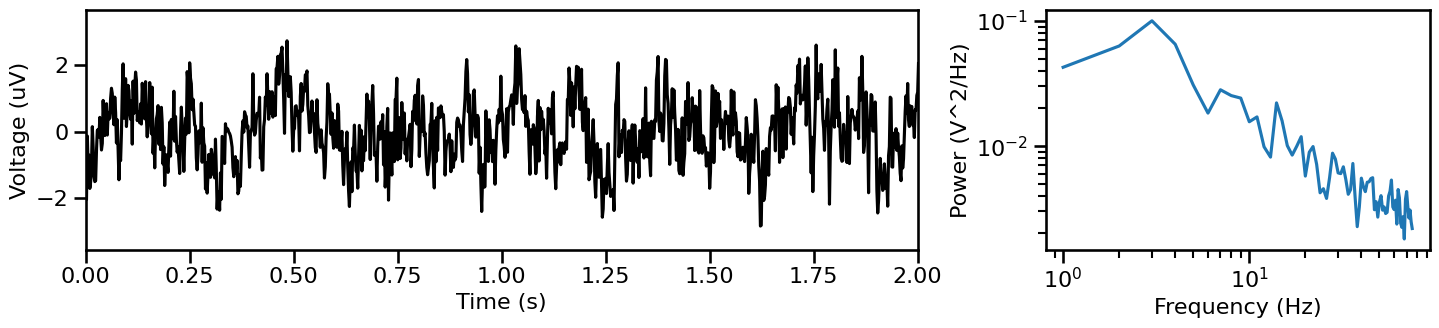

In [11]:
plot_timeseries_and_psd(times, sig_pow, fs)

### Continuous Oscillation

Next, we can simulate an  oscillation, in this case, a continuous sinusoid.

In [12]:
# Simulate an oscillation
sig_osc = sim_oscillation(n_seconds, fs, freq=default_freq)

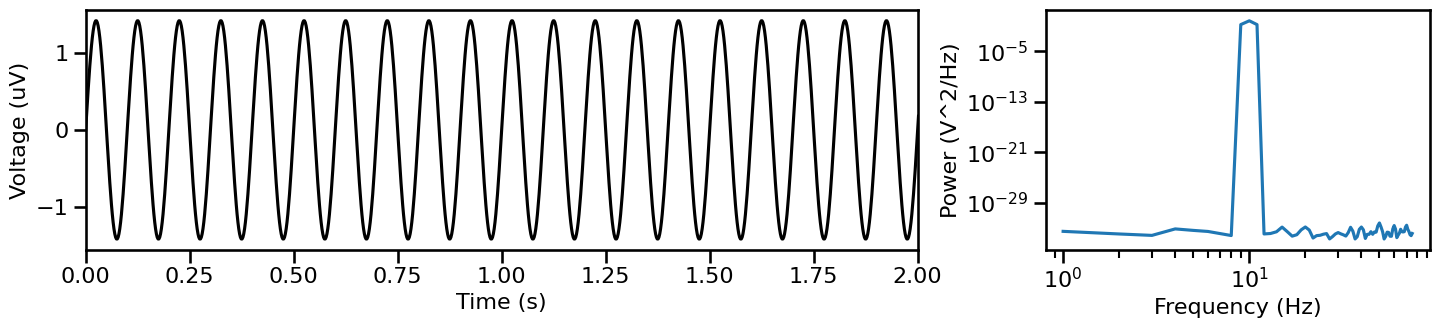

In [13]:
plot_timeseries_and_psd(times, sig_osc, fs)

### Combined Signal

Now we can can combine the aperiodic and periodic components from above, and create a combined signal.

In [14]:
# Simulate a combined signal, with an aperiodic and a periodic component
sig_comb = sim_combined(n_seconds, fs, comps_osc)

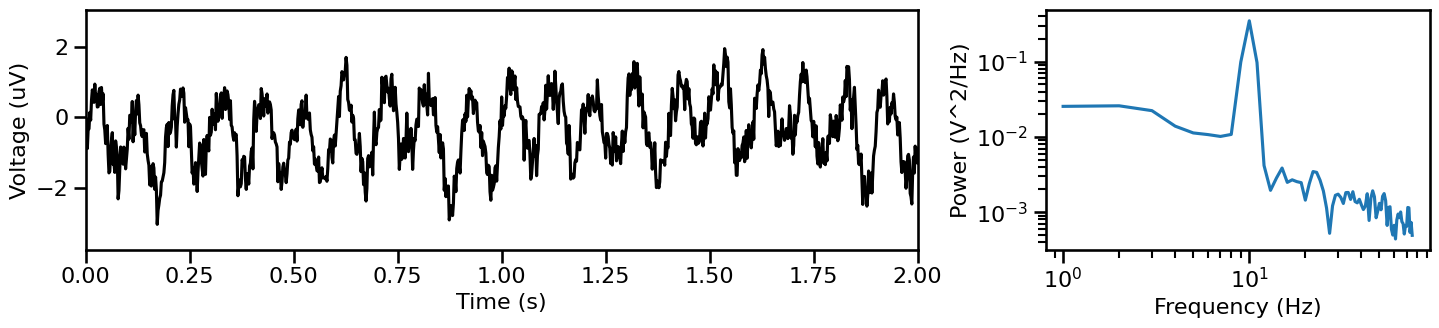

In [15]:
plot_timeseries_and_psd(times, sig_comb, fs)

### Synpatic Signal: Aperiodic Activity with a Knee

There are different possible ways to simulate aperiodic activity.

In this next simulation, we will simulate a 'synpatic current' model, which creates aperiodic activity with a knee.

In [16]:
# Simulate aperiodic activity from a synaptic current model
sig_kn = sim_synaptic_current(n_seconds, fs)

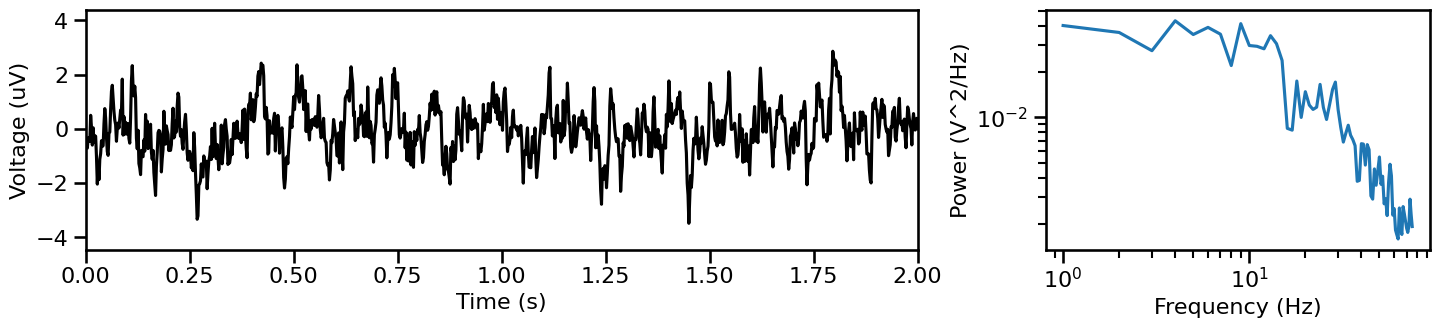

In [17]:
plot_timeseries_and_psd(times, sig_kn, fs)

### Bursty Oscillation

Oscillations are also not necessarily continuous. We we will simulate a combined signal with a bursty oscillation.

In [18]:
# Simulate a combined signal with a bursty oscillation
sig_burst = sim_combined(n_seconds, fs, comps_burst)

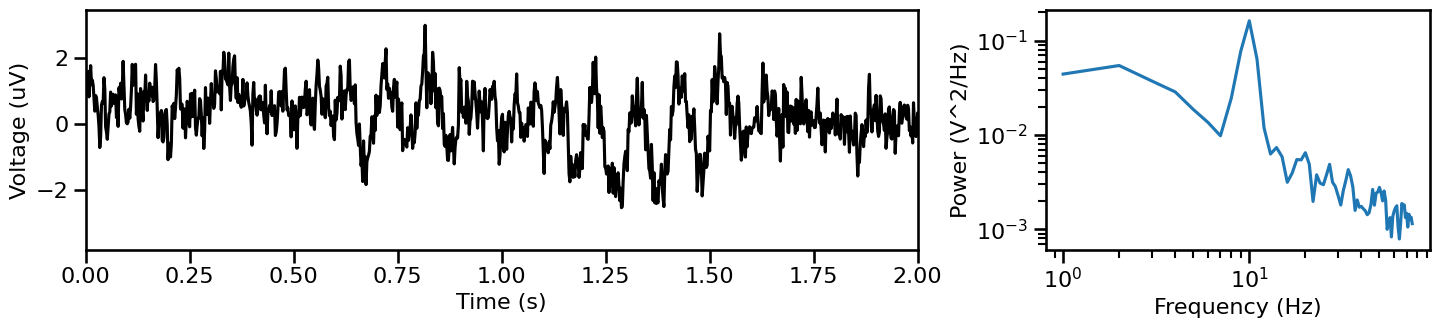

In [19]:
plot_timeseries_and_psd(times, sig_burst, fs)

## Example Time Series

In the notebooks that follow, you will see that measures are applied to a set of 'example' time series. 

These examples are time series that have been pre-computed, using the functions above. 

This set of example signals is shown here.

In [20]:
# Import the pre-computed example signals
from apm.sim.examples import TIMES, SIG_AP, SIG_KN, SIG_OSC, SIG_COMB, SIG_BURST

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:101: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:101: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:101: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:101: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


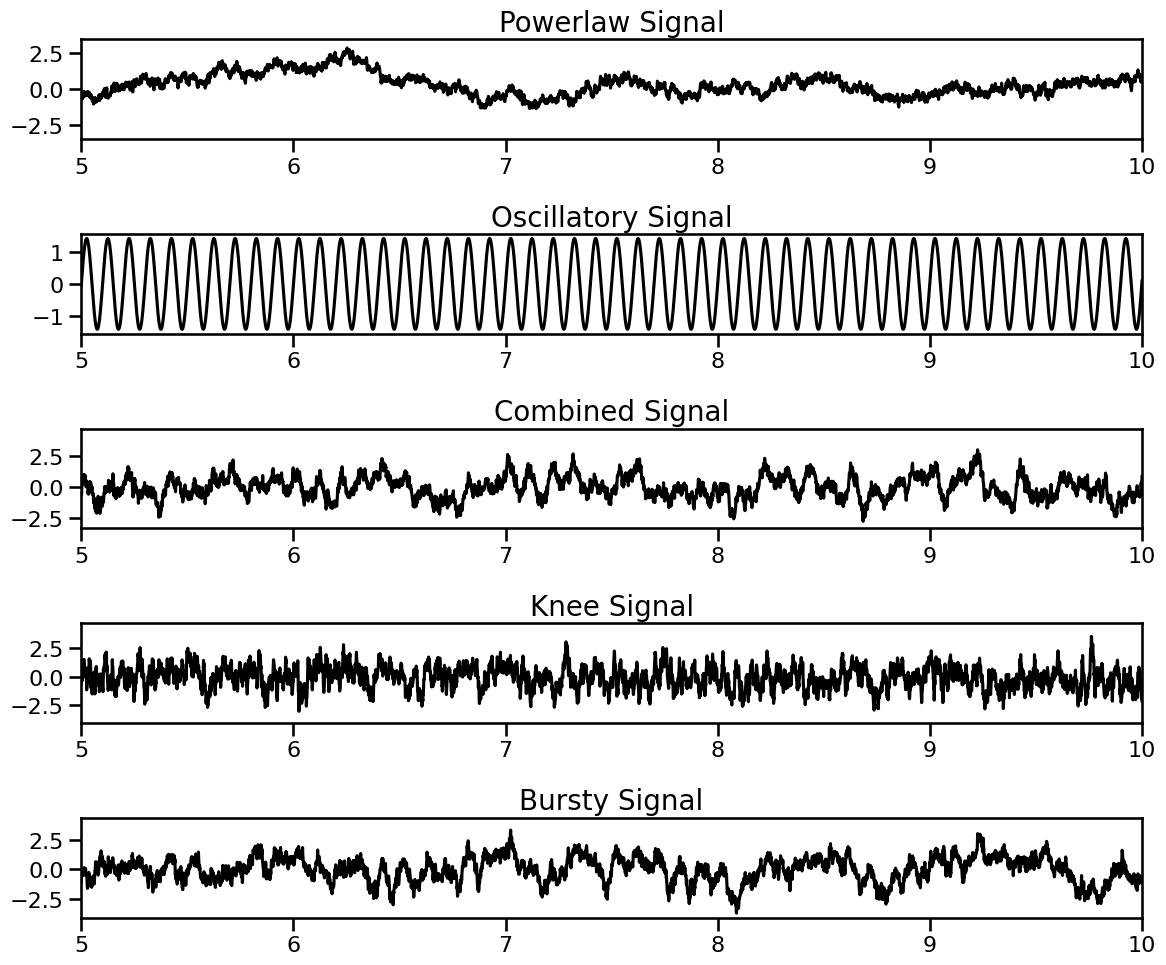

In [21]:
_, axes = plt.subplots(5, 1, figsize=(12, 10))
plt_kwargs = {'xlabel' : '', 'ylabel' : '', 'xlim' : [5, 10]}
plot_time_series(TIMES, SIG_AP, title='Powerlaw Signal', **plt_kwargs, ax=axes[0])
plot_time_series(TIMES, SIG_OSC, title='Oscillatory Signal', **plt_kwargs, ax=axes[1])
plot_time_series(TIMES, SIG_COMB, title='Combined Signal', **plt_kwargs, ax=axes[2])
plot_time_series(TIMES, SIG_KN, title='Knee Signal', **plt_kwargs, ax=axes[3])
plot_time_series(TIMES, SIG_BURST, title='Bursty Signal', **plt_kwargs, ax=axes[4])

## Power Spectrum Simulations

Power spectra are simulated using [SpecParam](https://fooof-tools.github.io/). 

### Single Peak & Fixed Mode

First, we can simulate a power spectrum with a single peak with a 1/f aperiodic component. 

In [22]:
freqs, powers = gen_power_spectrum([3, 40], [1, 1], [10, 0.3, 1], nlv=0.025)

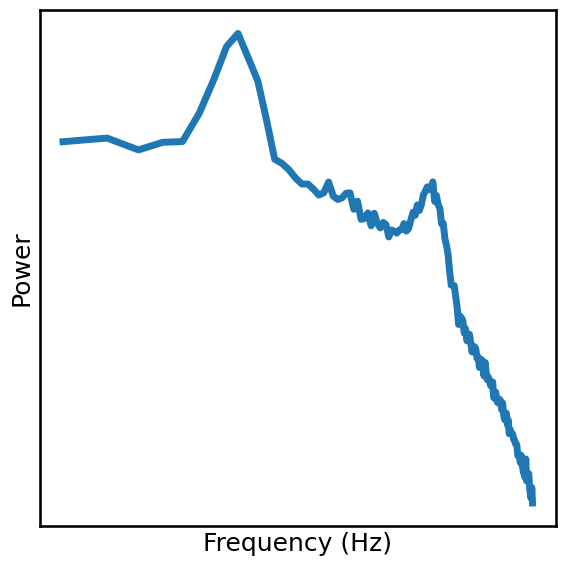

In [32]:
plot_power_spectra(freqs, powers, lw=5, ylabel='Power', custom_styler=custom_psd_style,
                   save_fig=SAVE_FIG, file_name='psd_fixed' + EXT, file_path=FP)

### Multi-Peak & Knee Mode

Next, we can simulate a pwoer spectrum that has multiple peaks, and an aperiodic component with a knee.

In [24]:
freqs, powers = gen_power_spectrum([1, 75], [0, 400, 1], [[5, 0.025, 1], [30, 0.02, 4]], nlv=0.001)

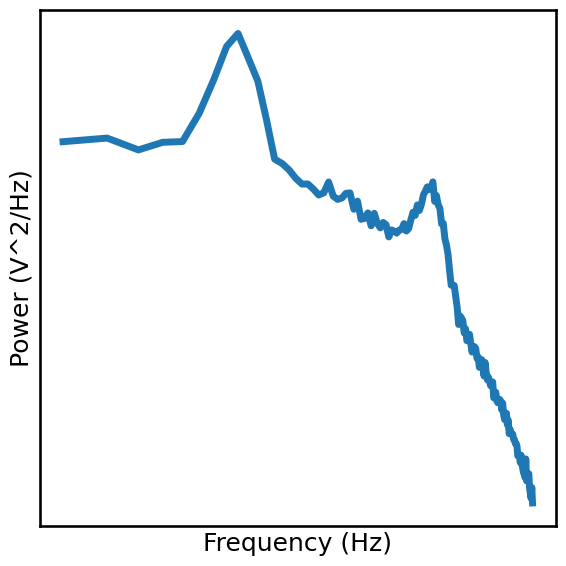

In [30]:
plot_power_spectra(freqs, powers, lw=5, custom_styler=custom_psd_style,
                   save_fig=SAVE_FIG, file_name='psd_knee' + EXT, file_path=FP)